<a href="https://colab.research.google.com/github/StarHub190/chemfo/blob/main/Kalibrasi_Spektrofotometer_(Polynomial_Regresi_dan_cross_validation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Latar Belakang

Dalam membuat kurva kalibrasi untuk identifikasi suatu analit. Menurut Hukum Lambert-Beer, hubungannya seharusnya linear. Akan tetapi, pada konsentrasi tinggi, sering terjadi penyimpangan yang menyebabkan kurva menjadi melengkung. Data sintetis ini akan mensimulasikan fenomena ini

### Membuat data dan import library

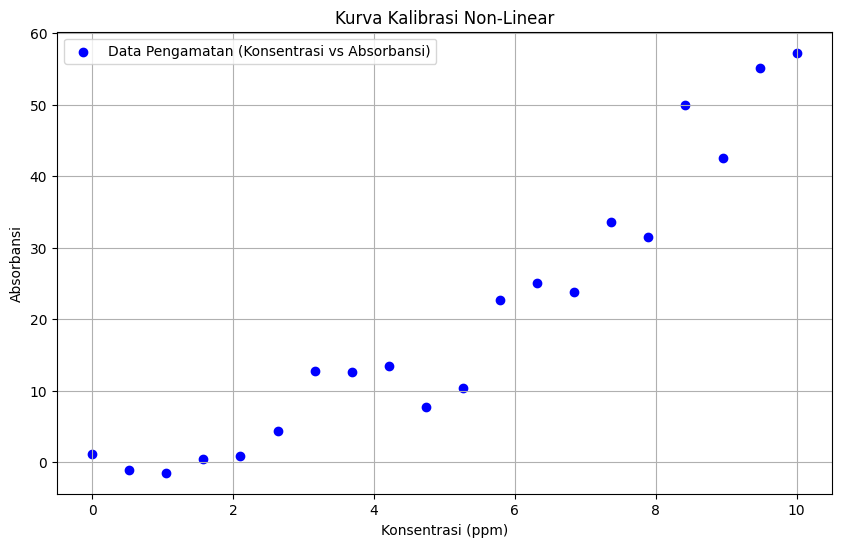

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Membuat data hipotetis

np.random.seed(19)

# buat 20 titik data untuk konsentrasi (X) dari 0 hingga 10
X = np.linspace(0, 10, 20).reshape(-1, 1)

y = 0.8 * X + 0.5 * X**2 + np.random.randn(20, 1) * 5

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Pengamatan (Konsentrasi vs Absorbansi)')
plt.title('Kurva Kalibrasi Non-Linear')
plt.xlabel('Konsentrasi (ppm)')
plt.ylabel('Absorbansi')
plt.legend()
plt.grid(True)
plt.show()

### Fitting Linear Regression

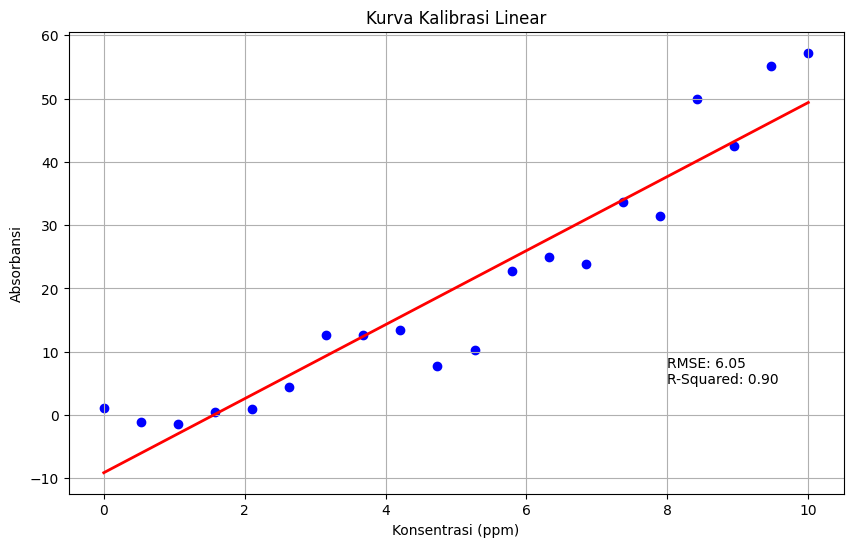

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
# fitting regresi
linear_model.fit(X, y)
# prediksi regresi
y_pred_linear = linear_model.predict(X)

mse = mean_squared_error(y, y_pred_linear)
r2 = r2_score(y,  y_pred_linear)
rmse = np.sqrt(mse)
# plotting regresi
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Pengamatan')
plt.plot(X, y_pred_linear, color='red', linewidth=2)
plt.text(8, 5, f'RMSE: {rmse:.2f} \nR-Squared: {r2:.2f}')
plt.title('Kurva Kalibrasi Linear')
plt.xlabel('Konsentrasi (ppm)')
plt.ylabel('Absorbansi')
plt.grid(True)
plt.show()

Dari grafik diatas menunjukkan bahwa ada banyak titik yang jauh dari plot regresi, kemudian rmse yang cukup besar yaitu **6.05** dan R-Squared yang terbilang sangat rendah untuk kurva kalibrasi yaitu **0.9**

### Regresi Polinomial

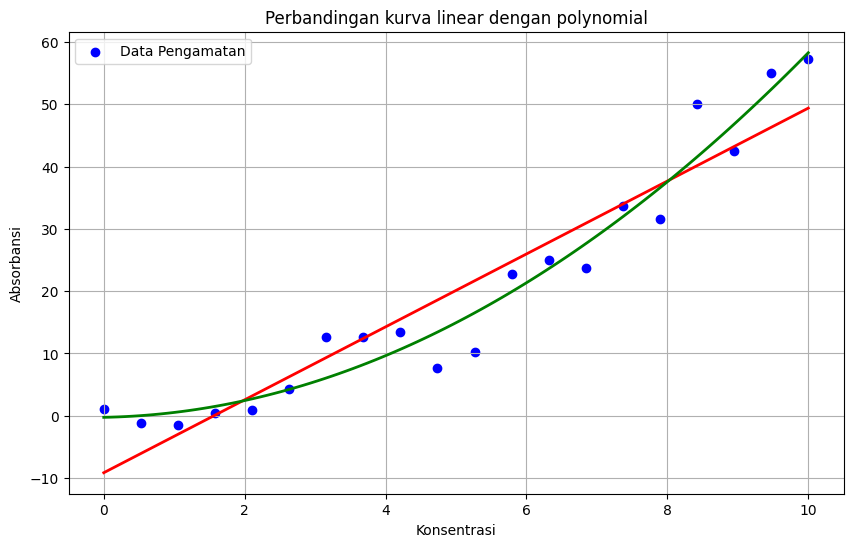

In [ ]:
# Buat fitur polinomial
poly_feature = PolynomialFeatures(degree=2, include_bias=False)

# ubah fitur X jadi polynomial
X_poly = poly_feature.fit_transform(X)

# Melihat bentuk poly
# print(f'Bentuk X asli: {X.shape}')
# print(f'Bentuk X setelah diubah ke polinomial: {X_poly.shape}')

# Melatih model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# buat prediksi data baru
X_baru = np.linspace(0, 10, 100).reshape(-1, 1)
X_baru_poly = poly_feature.transform(X_baru)
y_pred_poly = poly_model.predict(X_baru_poly)

# # evaluasi model
# rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))
# r2_poly = r2_score(y, y_pred_poly)

# Hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Pengamatan')
plt.plot(X, y_pred_linear, color='red', lw=2)
plt.plot(X_baru, y_pred_poly, color='green', lw=2)
# plt.text(8, -10, f'RMSE Poly: {rmse_poly} \nR-Squared: {r2_poly}', bbox=dict(facecolor='wheat', alpha=0.5))
# plt.text(8, 10, f'RMSE Linear: {rmse_linear} \nR-Squared: {r2_linear}', bbox=dict(facecolor='wheat', alpha=0.5))
plt.title('Perbandingan kurva linear dengan polynomial')
plt.xlabel('Konsentrasi')
plt.ylabel('Absorbansi')
plt.legend()
plt.grid(True)
plt.show()

### Overfitting (derajat 15)

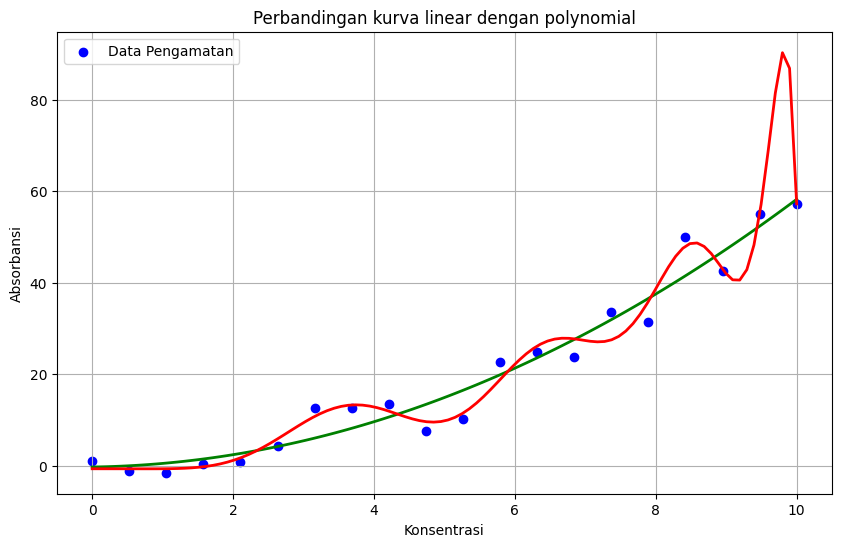

In [ ]:
poly_high = PolynomialFeatures(degree=15, include_bias=False)
X_polh = poly_high.fit_transform(X)

model_high = LinearRegression()
model_high.fit(X_polh, y)

# buat prediksi baru untuk plot
X_baru_high = poly_high.transform(X_baru)
y_predict_high = model_high.predict(X_baru_high)

# buat grafik
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color= 'blue', label='Data Pengamatan')
plt.plot(X_baru, y_pred_poly, color='green', lw=2)
plt.plot(X_baru, y_predict_high, color='red', lw=2)
plt.title('Perbandingan kurva linear dengan polynomial')
plt.xlabel('Konsentrasi')
plt.ylabel('Absorbansi')
plt.legend()
plt.grid(True)
plt.show()

## Cross Validation untuk Menentukan Derajat Terbaik

Derajat [1, 2, 3, 4, 5, 6, 10, 15]: Rata-rata MSE = 106.67, +/- 90.83881366713727
Derajat [1, 2, 3, 4, 5, 6, 10, 15]: Rata-rata MSE = 29.51, +/- 18.685428198398885
Derajat [1, 2, 3, 4, 5, 6, 10, 15]: Rata-rata MSE = 32.17, +/- 25.819004324216873
Derajat [1, 2, 3, 4, 5, 6, 10, 15]: Rata-rata MSE = 297.80, +/- 518.5235501927607
Derajat [1, 2, 3, 4, 5, 6, 10, 15]: Rata-rata MSE = 3292.59, +/- 4000.6858777195707
Derajat [1, 2, 3, 4, 5, 6, 10, 15]: Rata-rata MSE = 10786.13, +/- 14781.66062757928
Derajat [1, 2, 3, 4, 5, 6, 10, 15]: Rata-rata MSE = 171489701.12, +/- 227346331.00849283
Derajat [1, 2, 3, 4, 5, 6, 10, 15]: Rata-rata MSE = 27060804427.48, +/- 54121608617.24492


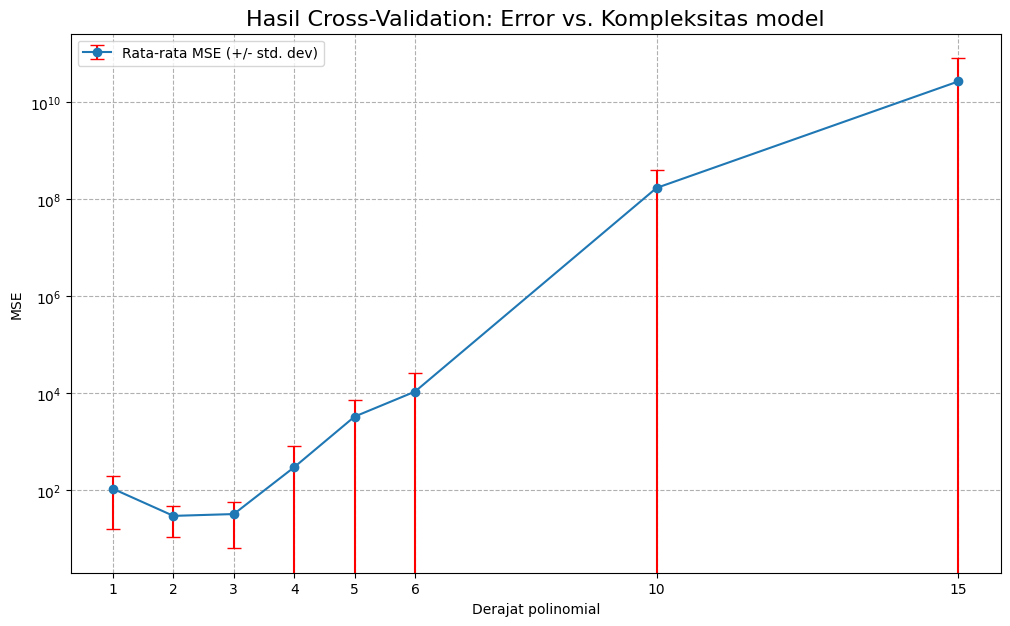

Derajat terbaik berdasarkan Cross-Validation adalah 2


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Pengaturan eksperimen
# derajat polinomial yang diuji
degrees = [1, 2, 3, 4, 5, 6, 10, 15]
# Jumlah fold
k_fold = 5

# List menyimpan hasil
mean_errors = []
std_errors = []

# Looping untuk menguji setiap derajat

for degree in degrees:
    # make_pipeline merupakan cara untuk menggabungkan beberapa langkah
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # melakukan K-Fold CV dengan cross_val_score
    scores = cross_val_score(model, X, y, cv=k_fold, scoring='neg_mean_squared_error')
    # scores diatas akan mengembalikan hasil negatif

    # ubah scores negatif jadi positif dan disimpan dalam list
    mean_errors.append(np.mean(np.abs(scores)))
    std_errors.append(np.std(np.abs(scores)))

    print(f'Derajat {degrees}: Rata-rata MSE = {np.mean(np.abs(scores)):.2f}, +/- {np.std(np.abs(scores))}')

# visualisasi hasil
plt.figure(figsize=(12, 7))
plt.title ('Hasil Cross-Validation: Error vs. Kompleksitas model', fontsize=16)
plt.errorbar(degrees, mean_errors, yerr=std_errors, fmt='-o', capsize=5, ecolor='red', label='Rata-rata MSE (+/- std. dev)')
plt.xlabel('Derajat polinomial')
plt.ylabel('MSE')
plt.yscale('log') # Menggunakan skala logaritmik agar perbedaan lebih terlihat
plt.xticks(degrees)
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()

# Menemukan derajat terbaik secara otomatis
best_degree_index = np.argmin(mean_errors)
best_degree = degrees[best_degree_index]
print(f'Derajat terbaik berdasarkan Cross-Validation adalah {best_degree}')


Dari grafik diatas, error jatuh drastis pada derajat kedua (garis vertikal paling pendek) yang menandakan model mulai menangkap pola data dengan baik